In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data_processing.cgm_data import CGMData, DATA_PATH
from data_processing.derived_datasets import max_glucose_dataset,max_glucose_between_meals_dataset


In [2]:
data = CGMData()

Things we need for regression of "peak glucose during interval between meals" and "glucose reading at time of meal, protein, carbs, fat

# Peak glucose between meals:
For this we will need a function that: 
1. Determines the length of time between meals - done
2. Grabs the glucose readings during this time - done
3. Returns the max reading, start value, and end value - done

# Glucose reading at time of meal:
This the end value from the previous function - done

# Protein, carbs, fat -> glycemic index:
This will come from the meal that's at the end time



In [3]:
# Max glucose between meals:
max_glucose_dataset(cgm_data=data,participant_num=1).head()

,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,recent_meals,participant,max_glucose,high_glucose
0,456.0,85.0,1.7,83.0,16.0,3.3,1.0,1,143,False
1,488.0,2.5,1.2,0.8,63.4,23.1,1.0,1,106,False
2,230.0,35.0,NaN,18.0,13.0,NaN,1.0,1,122,False
3,280.0,30.0,NaN,22.0,4.0,NaN,1.0,1,110,False
4,358.0,14.4,NaN,8.7,13.9,NaN,1.0,1,124,False


In [4]:
max_glucose_between_meals_dataset(cgm_data=data,participant_num=1).head()

,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,recent_meals,participant,max_glu_post_meal,glu_at_first_meal,glu_at_next_meal,high_glucose
0,456.0,85.0,1.7,83.0,16.0,3.3,1.0,1,143,59,108,False
1,488.0,2.5,1.2,0.8,63.4,23.1,1.0,1,114,104,93,False
2,230.0,35.0,NaN,18.0,13.0,NaN,1.0,1,122,92,90,False
3,280.0,30.0,NaN,22.0,4.0,NaN,1.0,1,110,89,101,False
4,358.0,14.4,NaN,8.7,13.9,NaN,1.0,1,146,105,86,False


Now we will implement linear regression

X will be peak glucose during interval between meals

y will be glucose reading at time of meal, protein, carbs, fat

In [39]:

y = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["max_glu_post_meal"]

In [40]:
x1 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["glu_at_first_meal"]
x2 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["calorie"]
x3 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["total_carb"]
x4 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["dietary_fiber"]
x5 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["sugar"]
x6 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["protein"]
x7 = max_glucose_between_meals_dataset(cgm_data=data,participant_num=1)["total_fat"]

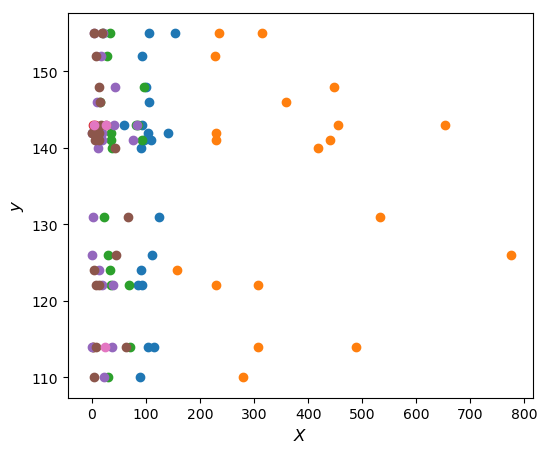

In [41]:
plt.figure(figsize=(6,5))

plt.scatter(x1, y)
plt.scatter(x2, y)
plt.scatter(x3, y)
plt.scatter(x4, y)
plt.scatter(x5, y)
plt.scatter(x6, y)
plt.scatter(x7, y)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

next turn this into a function of all these variables or explore using pairplot

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
slr = LinearRegression()

In [42]:
y.values.reshape(-1,1)

array([[143],
       [114],
       [122],
       [110],
       [146],
       [122],
       [140],
       [142],
       [124],
       [152],
       [114],
       [141],
       [126],
       [141],
       [155],
       [155],
       [131],
       [148],
       [142],
       [143]], dtype=int64)

In [44]:
slr.fit(x1.values.reshape(-1,1), y)

LinearRegression()

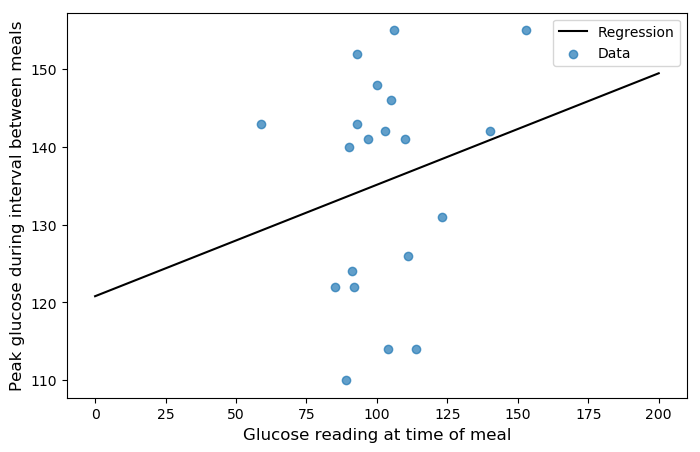

In [47]:
plt.figure(figsize=(8,5))

plt.scatter(x1, 
            y, 
            alpha=.7,
            label="Data")

plt.plot(np.linspace(0, 200, 100),
         slr.predict(np.linspace(0, 200, 100).reshape(-1,1)),
         'k',
         label='Regression')

plt.legend(fontsize=10)
plt.xlabel("Glucose reading at time of meal", fontsize=12)
plt.ylabel("Peak glucose during interval between meals", fontsize=12)


plt.show()

In [48]:
## We can look at beta_0_hat with .intercept_
slr.intercept_

120.79640084685957

In [49]:
## We can look at beta_1_hat with .coef_
slr.coef_

array([0.14337803])

Looks like the intercept is 120 and the slope is .14